<a href="https://colab.research.google.com/github/DhaninSelvakumar/Soft_suave_Task/blob/main/Dhanin(CSE_AI%26ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:

df = pd.read_csv("/content/student.csv", sep=";")



In [ ]:
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (395, 33)
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [ ]:
imputer = SimpleImputer(strategy="most_frequent")
df[df.columns] = imputer.fit_transform(df)

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [ ]:
print(df.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [ ]:
df["pass_fail"] = df["G3"].apply(lambda x: 1 if x >= 10 else 0)

In [ ]:
target_col = "pass_fail"
X = df.drop(columns=["G3", "pass_fail"])
y = df[target_col]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

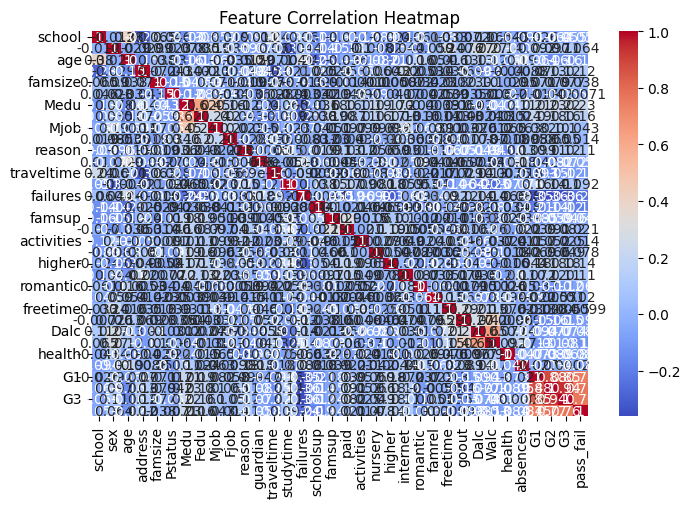

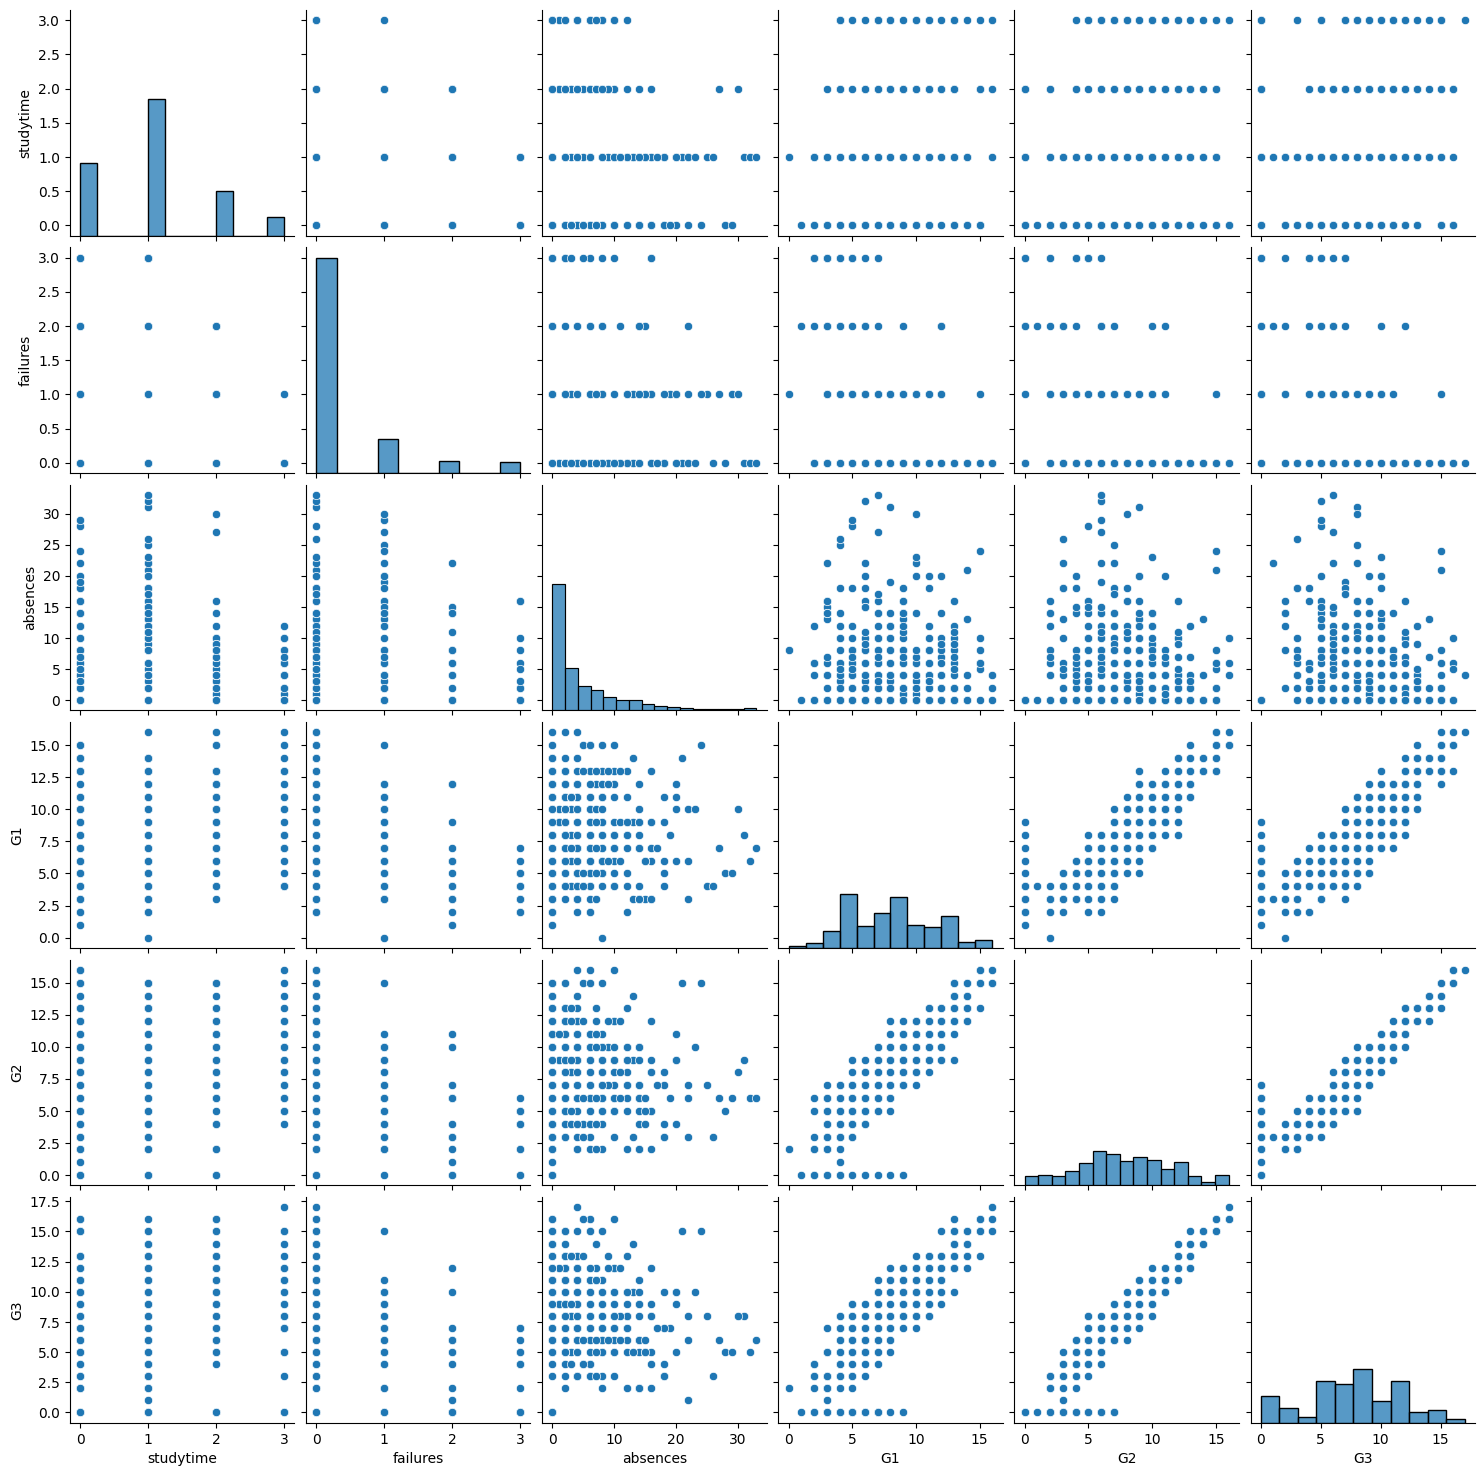

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


selected_cols = ['studytime', 'failures', 'absences', 'G1', 'G2', 'G3']
sns.pairplot(df[selected_cols])
plt.show()


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),

}


In [ ]:
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cv_results[name] = scores.mean()
    print(f"{name}: {scores.mean():.4f}")

best_model_name = max(cv_results, key=cv_results.get)
print(f"\nBest Model Based on CV: {best_model_name} ({cv_results[best_model_name]:.4f})")

Logistic Regression: 0.8937
Decision Tree: 0.9291
Random Forest: 0.9342
Gradient Boosting: 0.9367
XGBoost: 0.9392

Best Model Based on CV: XGBoost (0.9392)


In [ ]:
if best_model_name == "Random Forest":
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    }
    grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
elif best_model_name == "XGBoost":
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }
    grid = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
elif best_model_name == "Gradient Boosting":
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'learning_rate': [0.01, 0.1]
    }
    grid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
else:
    grid = None

if grid:
    grid.fit(X_scaled, y)
    print("\nBest Hyperparameters:", grid.best_params_)
    best_model = grid.best_estimator_
else:
    best_model = models[best_model_name]
    best_model.fit(X_scaled, y)


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}



Final Accuracy: 0.9746835443037974

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       0.97      0.97      0.97        31

    accuracy                           0.97        79
   macro avg       0.97      0.97      0.97        79
weighted avg       0.97      0.97      0.97        79



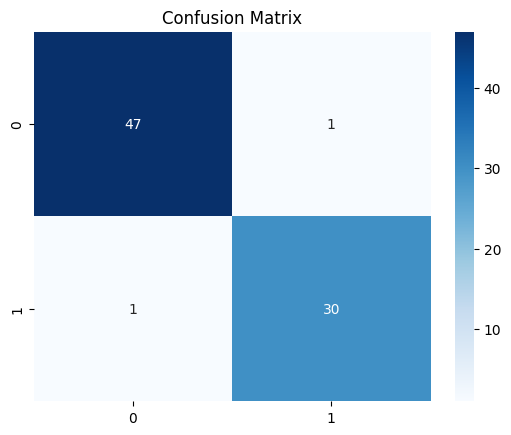

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\nFinal Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()